In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [10]:
majors = pd.read_csv('college_majors.csv')
majors.head()

,Unnamed: 0,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
1,1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,24387,52243,8947,0.096798,35000,25000,45000,37389,38119,14839
2,2,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,7494,23106,2393,0.061169,33000,25000,42000,2325,23341,9063
3,3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,2064,5949,510,0.055677,29000,20000,36000,563,7384,3163
4,4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,4690,9085,2006,0.119511,35000,25000,45000,4545,8794,2495


In [11]:
majors.drop(columns = ['Unnamed: 0'], inplace=True)
majors.columns

Index(['Major', 'Major_category', 'Grad_total', 'Grad_sample_size',
       'Grad_employed', 'Grad_full_time_year_round', 'Grad_unemployed',
       'Grad_unemployment_rate', 'Grad_median', 'Grad_P25', 'Grad_P75',
       'Nongrad_total', 'Nongrad_employed', 'Nongrad_full_time_year_round',
       'Nongrad_unemployed', 'Nongrad_unemployment_rate', 'Nongrad_median',
       'Nongrad_P25', 'Nongrad_P75', 'Grad_share', 'Grad_premium', 'Total',
       'Men', 'Women', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [12]:
majors1 = majors.drop(columns=['Major', 'Major_category'])
majors2 = majors.iloc[5:10, 5:10]
majors2.isnull().sum()
majors.shape

(172, 38)

In [13]:
corr = majors.corr()
cor_matrix = corr.style.background_gradient(cmap ='coolwarm')
cor_matrix

In [14]:
# drop highly correlated variables
upper_tri = majors.corr().abs().where(np.triu(np.ones(majors.corr().abs().shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
majors = majors.drop(majors[to_drop].columns, axis=1)

In [15]:
corr = majors.corr()
cor_matrix = corr.style.background_gradient(cmap ='coolwarm')
cor_matrix

,Grad_total,Grad_unemployment_rate,Grad_median,Nongrad_unemployment_rate,Grad_share,Grad_premium,ShareWomen,Unemployment_rate
Grad_total,1,-0.113084,0.00747715,-0.0671761,0.0810517,0.15489,0.167657,0.0250694
Grad_unemployment_rate,-0.113084,1,-0.139485,0.235691,-0.404728,-0.209872,-0.169013,0.197965
Grad_median,0.00747715,-0.139485,1,-0.294963,0.154801,0.207818,-0.554816,-0.0429531
Nongrad_unemployment_rate,-0.0671761,0.235691,-0.294963,1,-0.0798142,0.0584076,0.14155,0.29781
Grad_share,0.0810517,-0.404728,0.154801,-0.0798142,1,0.367475,0.258621,-0.0824561
Grad_premium,0.15489,-0.209872,0.207818,0.0584076,0.367475,1,0.291452,0.0717978
ShareWomen,0.167657,-0.169013,-0.554816,0.14155,0.258621,0.291452,1,0.0732046
Unemployment_rate,0.0250694,0.197965,-0.0429531,0.29781,-0.0824561,0.0717978,0.0732046,1


In [ ]:
##### SALARIES #####

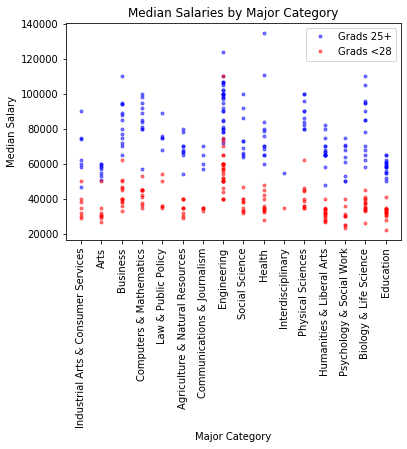

In [5]:
### Plot Median Salaries by Major Category ###
plt.plot(majors['Major_category'], majors['Grad_median'], marker='.', linestyle='none', color='b', alpha=0.5, label='Grads 25+')
plt.plot(majors['Major_category'], majors['Median'], marker='.', linestyle='none', color='r', alpha=0.5, label='Grads <28')
plt.xticks(rotation=90)
plt.xlabel('Major Category')
plt.ylabel('Median Salary')
plt.title('Median Salaries by Major Category')
plt.legend()

In [ ]:
# From the above plot, it looks like the major categories with the highest median salaries include Health, 
# Biology & Life Science, Engineering, followed by Physical Sciences, Computers & Mathematics, and Business. 
# Lowest median salaries seem to belong to Interdisciplinary, Arts, followed by Education and Communications 
# & Journalism. 

In [21]:
majors.sort_values('Grad_median',inplace=True) # (Majors ordered by category)
majors.head()

,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,24500,...,2064,5949,510,0.055677,29000,20000,36000,563,7384,3163
98,THEOLOGY AND RELIGIOUS VOCATIONS,Humanities & Liberal Arts,165460,3112,115266,90580,3926,0.032938,48000.0,32000,...,8767,13944,1617,0.062628,29000,22000,38000,9927,12037,3304
167,COUNSELING PSYCHOLOGY,Psychology & Social Work,51812,724,38468,28808,1420,0.035600,50000.0,36000,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
76,EARLY CHILDHOOD EDUCATION,Education,82430,1396,63027,43428,1760,0.027166,50000.0,40000,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
45,HUMAN SERVICES AND COMMUNITY ORGANIZATION,Psychology & Social Work,29262,555,23537,18213,1504,0.060061,50100.0,38000,...,2405,5061,326,0.037819,30000,24000,35000,2878,4595,724


Text(0.5, 1.0, 'Top 25 Median Salary Majors')

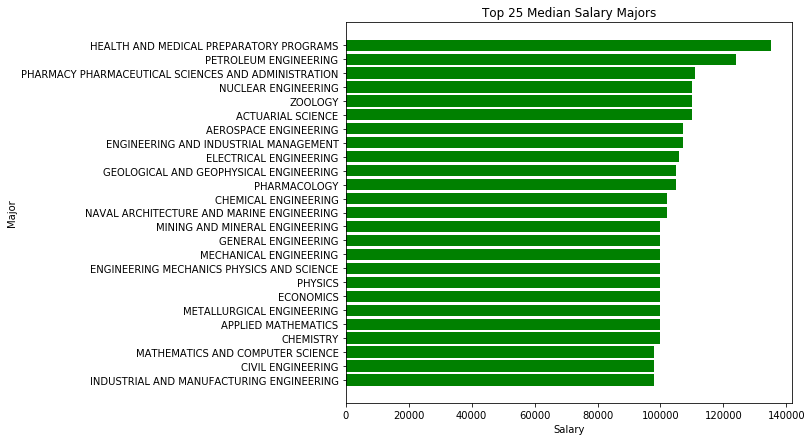

In [28]:
### Plot Median Salary of each Major (for grads 25+) ###
fig, ax = plt.subplots(figsize=(8,7))
ax.barh(majors['Major'][-25:], majors['Grad_median'][-25:], color='g')

ax.set_xlabel('Salary')
ax.set_ylabel('Major')
ax.set_title('Top 25 Median Salary Majors')

Text(0.5, 1.0, 'Bottom 25 Median Salary Majors')

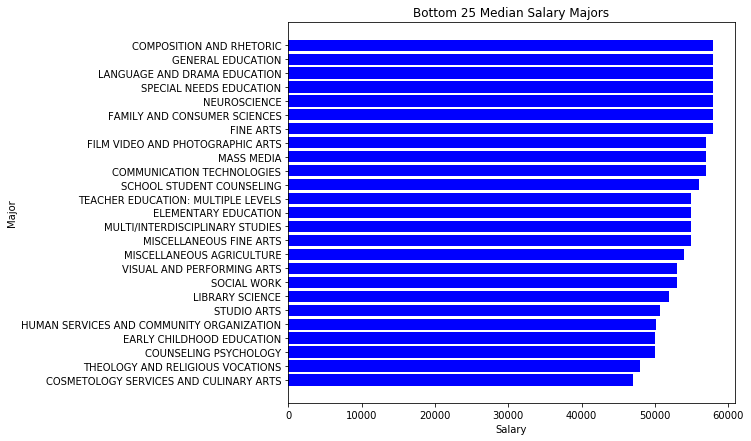

In [25]:
fig, ax = plt.subplots(figsize=(8,7))
ax.barh(majors['Major'][0:25], majors['Grad_median'][0:25], color='r')

ax.set_xlabel('Salary')
ax.set_ylabel('Major')
ax.set_title('Bottom 25 Median Salary Majors')

Text(0.5, 1, 'Median Salary Distributions for Each Major Category')

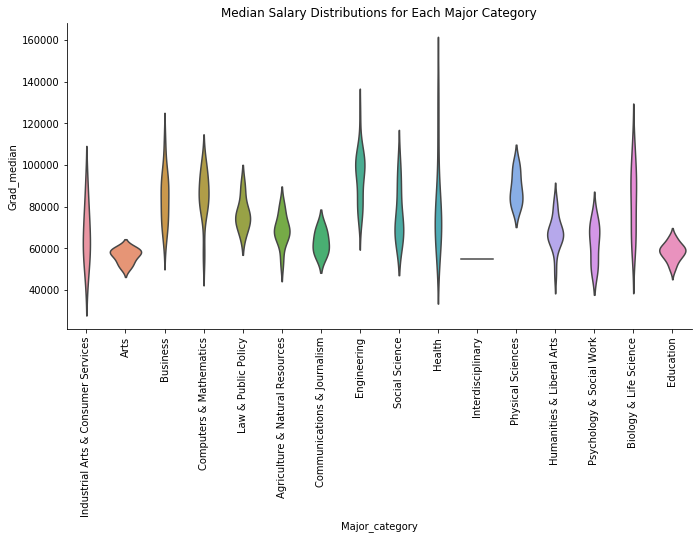

In [39]:
sns.catplot(x='Major_category', y='Grad_median', kind='violin', data=majors, height=5, aspect=2, split=True, inner=None, ) 
plt.xticks(rotation=90)
plt.title('Median Salary Distributions for Each Major Category')

In [163]:
##### EMPLOYMENT #####

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

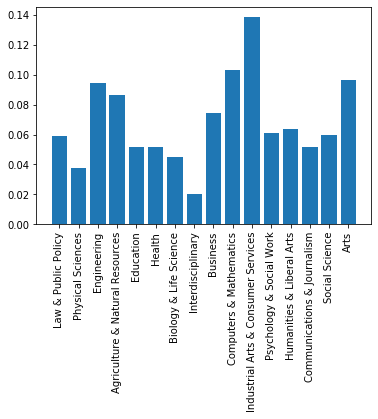

In [36]:
plt.bar(majors['Major_category'], majors['Grad_unemployment_rate'])
plt.xticks(rotation=90)

In [131]:
##### DEMOGRAPHICS #####

Text(0.5, 1.0, 'Demographics for each major (Men and Women)')

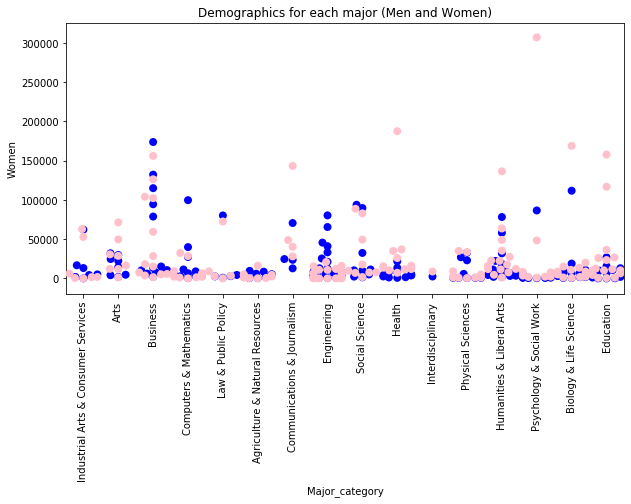

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.swarmplot(x=majors['Major_category'], y=majors['Men'], color='b', size=8) 
ax = sns.swarmplot(x=majors['Major_category'], y=majors['Women'], color='pink', size=8) 
plt.xticks(rotation=90)
#ax.legend(labels=['Men', 'Women']) 
plt.title('Demographics for each major (Men and Women)')

In [16]:
majors.to_csv('college_majors1.csv') # save file